In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pandas.api.types import CategoricalDtype
import numpy as np

warnings.filterwarnings('ignore')

In [3]:
'''
TB_01_D_01_s1
Population/morph ID (yes, it corresponds to the index in my diss)
Individual ID (generally five per collecting site, more for polymorphic sites)
D = Dorsal, V= Ventral
01, 02, or 03 = measurement area (three on dorsal side, three on ventral side)
s1 or s2 = replicate (no differences between measurement sets)
'''

spec=pd.read_csv("InputFiles/spec_data_lrf4Adam_Dorsal.csv")

In [4]:
#Mean by technical replicates
spec[["sample","replicate"]]=spec["Sample_ID"].str.rsplit("_",1,expand=True)
replicates=spec.groupby("sample", as_index=False).mean()

In [5]:
#Mean per individual
replicates[["pop","indv","D","measure"]]=replicates["sample"].str.rsplit("_",3,expand=True)
indiv=replicates.groupby(["pop","indv"], as_index=False).mean()
popmean=indiv.groupby(["pop"], as_index=False).mean() 

In [6]:
replicates.head()

sample           B1       S1U       S1V       S1B       S1G       S1Y  \
0  CA_02_D_01   750.573577  0.175690  0.189901  0.083387  0.444302  0.315113   
1  CA_02_D_02   812.620062  0.177847  0.198455  0.129545  0.415143  0.287966   
2  CA_02_D_03  1375.067154  0.184356  0.205476  0.156450  0.389302  0.284085   
3  CA_03_D_01  1229.659241  0.130056  0.142567  0.097175  0.467030  0.330686   
4  CA_03_D_02  1018.957371  0.142159  0.155983  0.103766  0.449651  0.315087   

        S1R pop indv  D measure  
0  0.304146  CA   02  D      01  
1  0.285624  CA   02  D      02  
2  0.277686  CA   02  D      03  
3  0.313927  CA   03  D      01  
4  0.312647  CA   03  D      02

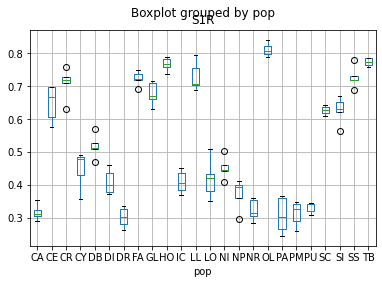

In [7]:
'''
S1V- violet
S1B- blue
S1G- green
S1Y- yellow
S1R- red
B1- total brightness
S1U- ultra violet excluded


CA - Isla Cayo Agua
CE, CY - Cementery
CR - Costa Rica
DB, DI, DR- Dolphin Bay
FA - Mainland farm
GL - La Gloria
HO - Hospital Point, Solarte
IC - Colón
LL - La Loma
LO - Loma Extrella
NI - Isla Pastores
NP - North Popa
NR - Rana Azul
OL - Old Point Bastimentos
PA - Isla Loma Partida
PM - Loma Partida, aguacate
PU - Punta Laurel. Popa
SC - San Cristobal
SI - El silencio, mainland
SS - Southeast Solarte
TB - Tranquilo Bay
'''
indiv.boxplot(column="S1R",by="pop")
plt.savefig("outputFiles/originalpops_red.pdf")

In [8]:
#Selected populations
diana_pops=["SK","RA","CL","CMR","CMY","DBB","DBI","DBR","HP","PO","SC","TB","PD"]
layla_pops=["DR","NR","IC","CE" , "CY","DR" ,"DI" ,"DB" ,"HO","PU","SC","TB","NP"]

In [9]:
poporder = CategoricalDtype(
    ["SC","DBR","DBI","DBB","SK","RA","PO","CL","CMY","CMR","HP","TB","PD"], 
    ordered=True
)

In [10]:
set(indiv["pop"])

{'CA',
 'CE',
 'CR',
 'CY',
 'DB',
 'DI',
 'DR',
 'FA',
 'GL',
 'HO',
 'IC',
 'LL',
 'LO',
 'NI',
 'NP',
 'NR',
 'OL',
 'PA',
 'PM',
 'PU',
 'SC',
 'SI',
 'SS',
 'TB'}

In [12]:
dic_popcode = dict(zip(layla_pops,diana_pops))
indiv_pop2=indiv.replace({"pop": dic_popcode },inplace=False)
toadd=indiv_pop2[indiv_pop2["pop"]=="DBB"]
toadd["pop"]="SK"
indiv_pop2=indiv_pop2.append(toadd)
indiv_pop2['pop'] = indiv_pop2['pop'].astype(poporder)

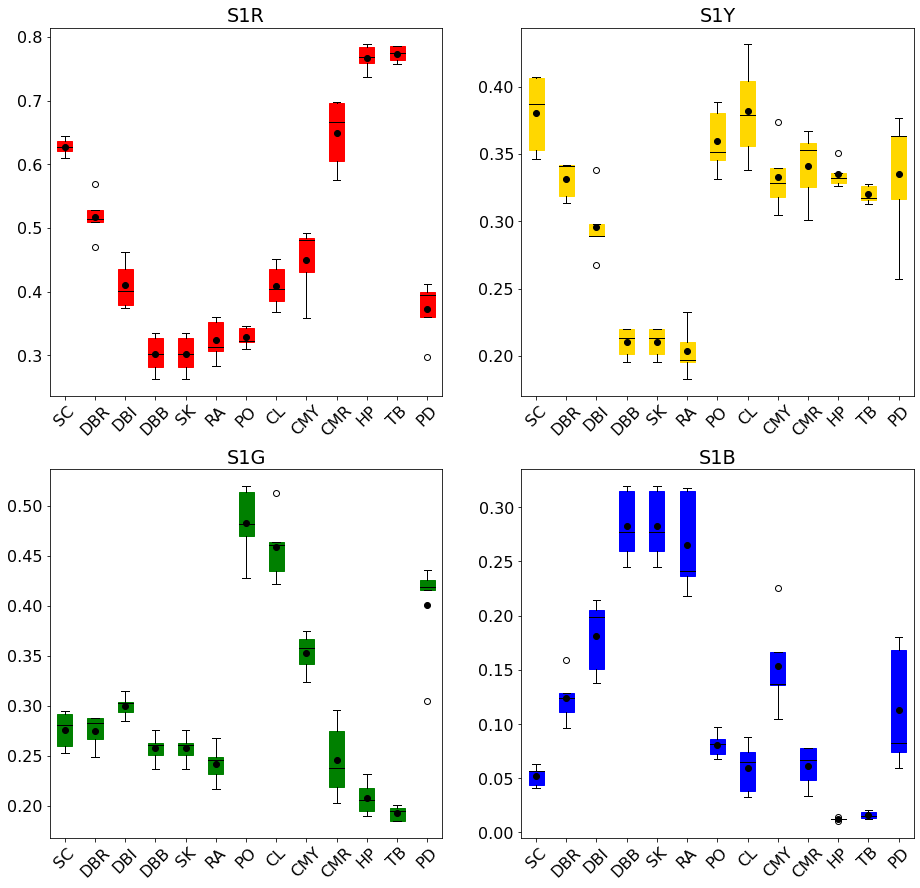

In [43]:
#I am almost sure that the DB and DR are flipped, confirmed by Layla
mypops=indiv_pop2[indiv_pop2['pop'].isin(diana_pops)]

fig, ax_new = plt.subplots(2,2,figsize=(15,15))

bp=mypops.boxplot(column=["S1R","S1Y","S1G","S1B"],by="pop",
                  ax=ax_new, showmeans=True,
                  return_type='dict',patch_artist = True,
                  meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})

plt.xticks(rotation = 45)
[item.set_color('red') for item in bp["S1R"]['boxes']]
[item.set_color('blue') for item in bp["S1B"]['boxes']]
[item.set_color('green') for item in bp["S1G"]['boxes']]
[item.set_color('gold') for item in bp["S1Y"]['boxes']]

[[item.set_color('k') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('k') for item in bp[key]['caps']] for key in bp.keys()]
[[item.set_color('k') for item in bp[key]['medians']] for key in bp.keys()]


# Set general font size
plt.rcParams['font.size'] = '16'
#Rotate ticks
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
    plt.xlabel("")
    ax.grid(False)



fig.suptitle('')
plt.savefig("./outputFiles/spec_perpopv2.png")
plt.show()

## Merge with Adam's Classification

In [103]:
class1=pd.read_table("InputFiles/class1pumilio.tsv",
                     names=["popcode","pop","mom","dad","sex","class1"])

In [104]:
class1["popcode"].replace("AG","SK",inplace=True)
class1["popcode"].replace("PP","PO",inplace=True)
class1.loc[class1["pop"].str.contains("^(?:PP34|PP35|PP36)"),"popcode"]="PD"

In [105]:
class1["popcode"].value_counts()

DBI    41
TB     35
PO     34
CMR    33
DBB    32
DBR    31
SK     30
CMY    30
HP     30
SC     26
CL     15
RA      7
PD      3
Name: popcode, dtype: int64

In [106]:
fam=pd.read_table("InputFiles/pumilio.ok.rescaffold2.fam",sep="\s",
                     names=["pop","bam","mom","dad","useless","nothing"])


In [107]:
fam["pop"]=fam["pop"].str.replace("\.r","")
class1["pop"]=class1["pop"].str.replace("TB03_S2.bam","PP37_S2.bam")
new=pd.merge(fam,class1,on=["pop","mom","dad"],sort=False,how="left")
class1_rescaffold=new[["popcode","bam","mom","dad","sex","class1"]]
class1_rescaffold.to_csv("outputFiles/class1_rescaffold.tsv",sep="\t",index=False,header=False)

In [108]:
class1_rescaffold.rename(columns={'popcode':'pop'},inplace=True)

In [109]:
popdf=mypops.groupby("pop",as_index=False).mean().round(3)

In [110]:
assoc=pd.merge(class1_rescaffold,popdf,on="pop")

In [111]:
#Exclude Dolphin bay and Aguacate from Class1
assoc.loc[assoc["pop"]=="SK","class1"]=-9
assoc.loc[assoc["pop"]=="RA","class1"]=-9
assoc.loc[assoc["pop"]=="DBB","class1"]=-9
assoc.loc[assoc["pop"]=="DBI","class1"]=-9
assoc.loc[assoc["pop"]=="DBR","class1"]=-9

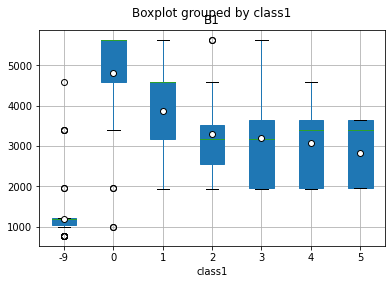

In [112]:
assoc.boxplot(column=["B1"],by="class1",showmeans=True,
                  return_type='dict',patch_artist = True,
                  meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})


plt.savefig("./outputFiles/Class1vsBrightnessv2.png")

## Merge with Black proportion 

In [113]:
bpCLPP=pd.read_table("outputFiles/thresholdingClass.tsv",sep="\s",
                     names=["indv","blackproportion"])
bpCM=pd.read_table("outputFiles/thresholdingClassCM.tsv",sep="\s",
                     names=["indv","blackproportion"])
bpSCTB=pd.read_table("outputFiles/thresholdingClassSCTB.tsv",sep="\s",
                     names=["indv","blackproportion"])

bpHP=pd.read_table("outputFiles/thresholdingClassHP.tsv",sep="\s",
                     names=["indv","blackproportion"])

In [114]:
frames = [bpCLPP, bpCM, bpSCTB,bpHP]

bpAll = pd.concat(frames)
bpAll.head()

indv  blackproportion
0  CL03         0.404244
1  CL05         0.105165
2  CL14         0.528407
3  CL15         0.476310
4  CL16         0.335112

In [115]:
assoc[["indv","trash"]]=assoc["bam"].str.rsplit("_",1,expand=True)
assoc.head()

pop              bam  mom  dad  sex  class1        B1    S1U  S1V    S1B  \
0  SK   AG01_S94.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   
1  SK  AG02_S231.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   
2  SK  AG03_S230.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   
3  SK  AG04_S188.r.bam    0    0    1      -9  1048.452  0.166  0.2  0.283   
4  SK  AG05_S241.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   

     S1G   S1Y    S1R  indv       trash  
0  0.257  0.21  0.302  AG01   S94.r.bam  
1  0.257  0.21  0.302  AG02  S231.r.bam  
2  0.257  0.21  0.302  AG03  S230.r.bam  
3  0.257  0.21  0.302  AG04  S188.r.bam  
4  0.257  0.21  0.302  AG05  S241.r.bam

In [116]:
assocbp=pd.merge(assoc,bpAll,on="indv",how="left")
assocbp.head()

pop              bam  mom  dad  sex  class1        B1    S1U  S1V    S1B  \
0  SK   AG01_S94.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   
1  SK  AG02_S231.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   
2  SK  AG03_S230.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   
3  SK  AG04_S188.r.bam    0    0    1      -9  1048.452  0.166  0.2  0.283   
4  SK  AG05_S241.r.bam    0    0    2      -9  1048.452  0.166  0.2  0.283   

     S1G   S1Y    S1R  indv       trash  blackproportion  
0  0.257  0.21  0.302  AG01   S94.r.bam              NaN  
1  0.257  0.21  0.302  AG02  S231.r.bam              NaN  
2  0.257  0.21  0.302  AG03  S230.r.bam              NaN  
3  0.257  0.21  0.302  AG04  S188.r.bam              NaN  
4  0.257  0.21  0.302  AG05  S241.r.bam              NaN

In [121]:
assocbp[assocbp["pop"]=="PD"]

pop              bam  mom  dad  sex  class1       B1    S1U    S1V    S1B  \
283  PD  PP34_S265.r.bam    0    0    2      -9  998.651  0.122  0.135  0.113   
284  PD  PP35_S269.r.bam    0    0    2       0  998.651  0.122  0.135  0.113   
285  PD  PP36_S254.r.bam    0    0    1       0  998.651  0.122  0.135  0.113   

     S1G    S1Y    S1R  indv       trash  blackproportion  
283  0.4  0.335  0.372  PP34  S265.r.bam              NaN  
284  0.4  0.335  0.372  PP35  S269.r.bam              NaN  
285  0.4  0.335  0.372  PP36  S254.r.bam              NaN

In [118]:
subset=assocbp[assocbp["blackproportion"].notna()]

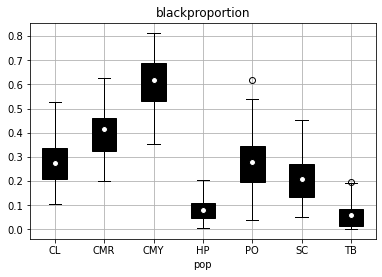

In [119]:
subset.boxplot(column=["blackproportion"],by="pop",showmeans=True,
                  return_type='dict',patch_artist = True,color="black",
                  meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.suptitle('')

plt.savefig("./outputFiles/BlackproportioPerPopv2.png")

blackproportion    {'whiskers': [Line2D(_child1), Line2D(_child2)...
dtype: object

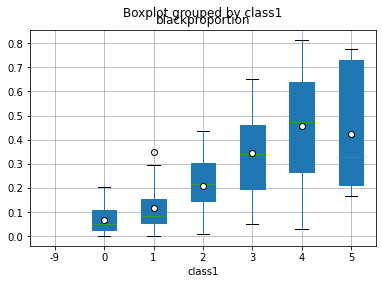

In [125]:
assocbp.boxplot(column=["blackproportion"],by="class1",showmeans=True,
                  return_type='dict',patch_artist = True,
                  meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})


#plt.savefig("./outputFiles/Class1vsBlackproportion.png")

## Write files

In [126]:
assoblack=assocbp[["pop","bam","mom","dad","sex","class1","B1",\
                   "S1U","S1V","S1B","S1G","S1Y","S1R","blackproportion"]]
assoblack.to_csv("outputFiles/blackprop.tsv",sep="\t",index=False,na_rep=-9)

In [127]:
assoc.to_csv("outputFiles/complete_table.tsv",sep="\t",index=False)

In [128]:
red=assoc[["pop","bam","mom","dad","sex","S1R"]]
red.to_csv("outputFiles/red_spec.tsv",sep="\t",index=False,header=False)

green=assoc[["pop","bam","mom","dad","sex","S1G"]]
green.to_csv("outputFiles/green_spec.tsv",sep="\t",index=False,header=False)

blue=assoc[["pop","bam","mom","dad","sex","S1B"]]
blue.to_csv("outputFiles/blue_spec.tsv",sep="\t",index=False,header=False)

yellow=assoc[["pop","bam","mom","dad","sex","S1Y"]]
yellow.to_csv("outputFiles/yellow_spec.tsv",sep="\t",index=False,header=False)